# บทที่ 22 การปรับจูน Model

# Workshop 1 : เปรียบเทียบผลขอล Hyperparameter

In [1]:
# 0.Data Preparation
# 1.Data Cleansing (ไม่มีการทำ)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # ตั้งค่ารกราฟสำหรับ seaborn

cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv('data/pima-indians-diabetes.csv', names=cols)
print(df.shape)
df.head()

(768, 9)


,preg,plas,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 2.Missing Data

df.drop('insu', axis=1, inplace=True) # ตัดและเติมข้อมูล missing data
# แทนข้อมูล 0 ด้วย median
df['bmi'] = df.bmi.replace(0, df.bmi.median())
df['plas'] = df.plas.replace(0,df.plas.median())
df['pres'] = df.pres.replace(0, df.pres.median())
df['skin'] = df.skin.replace(0, df.skin.median())

X = df.drop('class', axis=1) # Features
y = df['class'] # Class / Target / Label
print(X.shape, y.shape)


(768, 7) (768,)


In [3]:
#
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=None)
cvs = cross_val_score(model1, X, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) ={:.2f}' .format(cvs.mean()*100))

cross val scores [0.73 0.74 0.69 0.69 0.68 0.71 0.75 0.74 0.7  0.74]
Average (%) =71.61


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(criterion='entropy', max_depth=None)
cvs = cross_val_score(model2, X, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) ={:.2f}' .format(cvs.mean()*100))

cross val scores [0.69 0.78 0.68 0.69 0.71 0.7  0.77 0.7  0.71 0.75]
Average (%) =71.75


#การใช้ Hyper parameter ที่แตกต่างกันจะเห็นว่า cross val scores ได้แตกต่างกัน

# Workshop 2 : เปรียบเทียบอัลกอริทึม

In [5]:
# ลดสเกลเพื่อไม่ให้ features ตัวใดตัวหนึ่งมีอิทธิพลมากกว่ากันเนื่องจากตัวแปรที่มีค่ามากๆจะมีความไวในการตอบสนองมากกว่าจึงต้องปรับสเกล 0-1 (Normalize)
from sklearn.preprocessing import MinMaxScaler as Scaler

X = X.astype('float64') # เปลี่ยนจาก int เป็น float64
sc = Scaler()
X_sc = sc.fit_transform(X)

df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head().round(2)

,preg,plas,pres,skin,bmi,pedi,age
0,0.35,0.67,0.49,0.30,0.31,0.23,0.48
1,0.06,0.26,0.43,0.24,0.17,0.12,0.17
2,0.47,0.90,0.41,0.17,0.10,0.25,0.18
3,0.06,0.29,0.43,0.17,0.20,0.04,0.00
4,0.00,0.60,0.16,0.30,0.51,0.94,0.20


In [6]:
# ทำการ import library สร้าง list model แล้ว loop ประเมินด้วย Cross Validation
# ทำการ import library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
# สร้าง list model
models = []
models.append(('LR', LogisticRegression()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [8]:
#  loop ประเมินด้วย Cross Validation
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
    cvs = cross_val_score(model, X_sc, y, cv=10)
    names.append(name) # เอาตัวแปร name ไปเก็บชื่อโมเดลจาก models
    cvs = cross_val_score(model, X_sc, y, cv=10) # ตัวแปร model เก็บค่ามาจาก models ลำดับที่ 2 เช่น naemeเก็บ'LR' และ model เก็บ LogisticRegression()
    results.append(cvs) # เอาผล cvs ที่คำนวณได้เก็บไว้ใน results
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std())) #ปริ๊นผล

LR   0.764 (0.030)
kNN  0.729 (0.051)
NB   0.751 (0.038)
SVC  0.762 (0.045)
RFC  0.753 (0.059)
DT   0.695 (0.064)


In [9]:
results[:6]

[array([0.75324675, 0.76623377, 0.76623377, 0.72727273, 0.75324675,
        0.79220779, 0.76623377, 0.79220779, 0.71052632, 0.81578947]),
 array([0.67532468, 0.79220779, 0.80519481, 0.67532468, 0.68831169,
        0.74025974, 0.75324675, 0.79220779, 0.69736842, 0.67105263]),
 array([0.75324675, 0.74025974, 0.75324675, 0.66233766, 0.72727273,
        0.76623377, 0.75324675, 0.81818182, 0.75      , 0.78947368]),
 array([0.74025974, 0.79220779, 0.81818182, 0.67532468, 0.71428571,
        0.76623377, 0.79220779, 0.77922078, 0.72368421, 0.81578947]),
 array([0.7012987 , 0.79220779, 0.74025974, 0.66233766, 0.71428571,
        0.75324675, 0.83116883, 0.83116883, 0.68421053, 0.81578947]),
 array([0.62337662, 0.77922078, 0.62337662, 0.63636364, 0.66233766,
        0.64935065, 0.77922078, 0.76623377, 0.67105263, 0.76315789])]

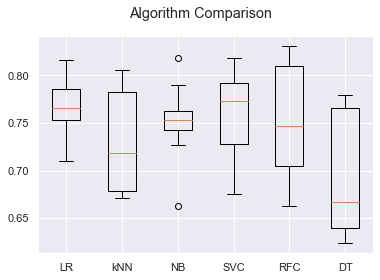

In [10]:
# พล็อตกราฟ boxplot เพื่อเลือก Best of algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) # row column id
plt.boxplot(results) # plot box plot
ax.set_xticklabels(names) # เลเบลชื่อ แกน x
plt.show()

# Workshop 3 : วิธีที่ 1 หาค่าพารามิเตอร์ด้วย Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV


param_grid = {
        'C': [1.0, 3.0, 5.0],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'shrinking': [True, False],
        'gamma': ['auto', 1, 0.1],
        'coef0': [0.0, 0.1, 0.5]
}

model = SVC()
grid_search = GridSearchCV(
    model, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_sc, y)

grid_search.best_score_ #, grid_search.best_estimator_



Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   29.6s finished


0.7721291866028708

In [12]:
# ต้้องการดู Parameter ที่ดีที่สุด
grid_search.best_params_

{'C': 3.0, 'coef0': 0.0, 'gamma': 1, 'kernel': 'rbf', 'shrinking': True}

In [13]:
# ต้้องการดู Parameter ที่ดีที่สุด แบบเต็มๆ
grid_search.best_estimator_

SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
# ต้องการดูแต่ละค่า
print(grid_search.best_estimator_.C)
print(grid_search.best_estimator_.kernel)
print(grid_search.best_estimator_.gamma)
print(grid_search.best_estimator_.coef0)

3.0
rbf
1
0.0


In [15]:
# ทดสอบ Cross Val score โดยใช้พารามิเตอร์ที่ Grid search แนะนำ
from sklearn.model_selection import cross_val_score

model = grid_search.best_estimator_ # ใช้ค่าจาก Grid Search CV
cvs = cross_val_score(model, X_sc, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.75 0.79 0.79 0.71 0.74 0.79 0.79 0.81 0.72 0.82]
Average (%) = 77.21


In [16]:
# ลองเปรียบเทียบโดยใช้ model อื่นแล้วเทียบ
model = SVC(kernel='linear')
cvs = cross_val_score(model, X_sc, y, cv=10)
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))
#จะได้ค่า cross val น้อยกว่า ใช้พารามิเตอร์ที่ grid search แนะนำ

cross val scores [0.74 0.77 0.79 0.71 0.74 0.81 0.78 0.79 0.72 0.82]
Average (%) = 76.69


# Workshop 4 : การนำค่าพารามิเตอร์ไปใช้งาน


In [17]:
model = grid_search.best_estimator_ # ใช้ค่าจาก Grid Search
# หรือเอามาแต่ค่าที่จำเป็น ที่เหลือเป็น default

In [18]:
# Train model
model.fit(X_sc, y)

SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
# ทดลองทำนายโรคเบาหวาน
# วัดค่าพารามิเตอร์ต่างๆของผู้ป่วยรายใหม่
new_df = pd.DataFrame([[5, 145, 70, 34, 32, .6, 49],
                       [2,  84, 66, 28, 25, .4, 30]])
new_df_sc = sc.transform(new_df) # scale values
predict = model.predict(new_df_sc) # predict
print(predict)
# คนแรกมีโอกาสเป็นเยาหวาน คนที่สองไม่เป็น

[1 0]


# Workshop 5 : หาค่าพารามิเตอร์ด้วย Grid Randomized

In [20]:
# import library ที่เกี่ยวข้อง
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(1.0,5.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model = SVC()
rnd_search = RandomizedSearchCV(
            model, param_dist, n_iter=100, cv=10, scoring='accuracy') 

rnd_search.fit(X_sc, y)
rnd_search.best_score_


0.7734449760765552

In [21]:
# บอกพารามิเตอร์ที่ดีที่สุด
rnd_search.best_params_

{'C': 3.2798568964845183,
 'coef0': 0.5,
 'gamma': 'auto',
 'kernel': 'poly',
 'shrinking': True}

In [22]:
rnd_search.best_estimator_

SVC(C=3.2798568964845183, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.5, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
# ในกรณีที่มีพารามิเตอร์เป็นจำนวนเต็มต้องใช้ randint
from scipy.stats import randint
param_dist = {
    'C': randint(1,5),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}
odel = SVC()
rnd_search = RandomizedSearchCV(
            model, param_dist, n_iter=100, cv=10, scoring='accuracy') 

rnd_search.fit(X_sc, y)
rnd_search.best_score_

0.7721291866028708

In [24]:
# ทดสอบ Cross val score ด้วยพารามิเตอร์ที่ได้จาก Randomized Search
from sklearn.model_selection import cross_val_score

model = grid_search.best_estimator_

cvs = cross_val_score(model, X_sc, y, cv=10)
print('cross val scores {}'.format(cvs.round(4)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.7532 0.7922 0.7922 0.7143 0.7403 0.7922 0.7922 0.8052 0.7237 0.8158]
Average (%) = 77.21


# Workshop 6 :ลอง Grid Search กับ Decision Tree 

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'criterion': ['gini','entropy'], # Algorithm ในการคำนวณคัดหาตัวแบ่ง Tree
        'max_depth': [2, 3, 4, 5], # ความลึกของต้นไม้
        'min_samples_split': [2, 3, 4, 5] # จำนวน Sample ต่ำสุดที่จะแยก Node
}

model = DecisionTreeClassifier()

In [26]:
grid_search = GridSearchCV(
            model, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_sc, y) # ใช้ Xที่ไม่ได้ทำ scaler ก็ได้ แต่จตะใช้เวลานานกว่า
grid_search.best_score_ # ได้ความแม่นยำ 0.7369 ใช้เวลา 0.9s fit 320 ครั้ง

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.6s finished


0.7369958988380041

In [27]:
grid_search.best_params_ # ดูโดยย่อ
grid_search.best_estimator_ # ดูแบบเต็ม

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Worlshop 7 : Randomized Search กับ Decision Tree

In [28]:
# ทดลองใช้ Randomized Search กับ Decision Tree

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist ={
    'criterion': ['gini','entropy'],
    'max_depth': randint(2, 5),
    'min_samples_split': randint(2, 5)
}

model = DecisionTreeClassifier()
rnd_search = RandomizedSearchCV(
            model, param_dist, cv=10, scoring='accuracy',
            random_state=10, verbose=1)
rnd_search.fit(X_sc, y)
rnd_search.best_score_
# ได้ความแม่นยำ 0.7369 ใช้เวลา 0.3s fit 100 fits

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


0.7369617224880383

In [41]:
grid_search.best_params_ # ดูโดยย่อ
#grid_search.best_estimator_ # ดูแบบเต็ม

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}